<a href="https://colab.research.google.com/github/RatanakamonS/DADS6003/blob/main/HW3_Logistic_Regression_6620422002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Library

### 0.1 Importing a library that is not in Colaboratory

In [173]:
!pip install shap
import shap

### 0.2 Importing a library in Colaboratory

In [174]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import sklearn
import warnings # ข้อความ warning
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #จัดการ Front ไทย

from sklearn.model_selection import train_test_split # Model Train, Test
from sklearn.preprocessing import LabelEncoder #Transform categories to numeric
from sklearn.linear_model import LogisticRegression # the LogisticRegression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # the function of metrics
from sklearn.preprocessing import StandardScaler # import the StandardScaler
shap.initjs() # แสดงผล shap

- จัดการ Front ภาษาไทย

In [175]:
# (1) ดาวน์โหลดไฟล์ฟอนต์ "TH Sarabun New" จาก GitHub
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# (2) เพิ่มฟอนต์ที่ดาวน์โหลดมาเข้าไปใน Font Manager ของ Matplotlib
fm.fontManager.addfont('thsarabunnew-webfont.ttf')
# (3) ตั้งค่าให้ฟอนต์ "TH Sarabun New" เป็นฟอนต์เริ่มต้นสำหรับ Matplotlib
mpl.rc('font', family='TH Sarabun New')

--2024-09-10 11:52:20--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-09-10 11:52:20--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.16’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.003s  

2024-09-10 11:52:20 (28.1 MB/s) -

## 1. Get data and clean data

### 1.1 Get "the Smartphone Using dataset" from Github

In [176]:
url = 'https://raw.githubusercontent.com/RatanakamonS/DADS6003/main/DB-%E0%B8%AA%E0%B8%B3%E0%B8%A3%E0%B8%A7%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89%20Smartphone%20(Responses)-Week5%20-%20Form%20Responses.csv'
df = pd.read_csv(url)
df.head()

,Timestamp,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด,จากข้อที่แล้ว เนื่องจากสาเหตุใด
0,1/13/2024 14:30:33,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS และ Andriod,น้อยที่สุด,ปานกลาง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone,apple ecosystem ทั้งบ้านแล้ว
1,1/13/2024 14:41:25,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone,ดูรวยดีย์
2,1/13/2024 15:01:08,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone,ความเสถียร
3,1/13/2024 15:01:44,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,คุ้นเคยกับ Brand เดิม
4,1/13/2024 15:01:48,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,ง่ายต่อการใช้งาน


### 1.2 Clean data

- เปลี่ยนชื่อ Features (คอลัมน์)

In [177]:
df.columns = ['time', 'gender', 'age', 'job', 'salary' ,'os', 'game', 'social_media', 'movies_song', 'photo_video', 'new_brand', 'by_reason']

- ลบ Features (คอลัมน์) ที่ไม่ใช้และ Row ที่มีค่าว่าง

In [178]:
df = df.drop(columns=['time', 'by_reason'])
df = df.dropna()
df = df[(df['gender'] != '-') & (df['job'] != '.') & ((df['os'] != 'IOS และ Andriod'))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 1 to 74
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   gender        69 non-null     object
 1   age           69 non-null     object
 2   job           69 non-null     object
 3   salary        69 non-null     object
 4   os            69 non-null     object
 5   game          69 non-null     object
 6   social_media  69 non-null     object
 7   movies_song   69 non-null     object
 8   photo_video   69 non-null     object
 9   new_brand     69 non-null     object
dtypes: object(10)
memory usage: 5.9+ KB


### 1.3 Define target feature and transform datatype

-  กำหนดให้ คอลัมน์ target ชื่อ 'os' (ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด) และแปลง datatype เป็น numeric

In [179]:
# (1) เลือก target variable
target = 'os'

# (2) แปลง categorical variables เป็น numeric
df_encoded = pd.get_dummies(df.drop(columns=[target]), drop_first=True)

# (3) แปลง target variable เป็น numeric ด้วย LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df[target])
print(f"Target variable (OS): \n -> {y}")

# (4) เลือก features
X = df_encoded.astype(int)
print("\nFeatures: \n ->")
X

Target variable (OS): 
 -> [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0]

Features: 
 ->


,gender_หญิง,age_26-30 ปี,age_31-35 ปี,age_36-40 ปี,job_ข้าราชการ,job_นักศึกษา,job_รัฐวิสาหกิจ,job_ว่างงาน,job_เอกชน,"salary_30,001-40,000 บาท",...,photo_video_น้อยที่สุด,photo_video_บ่อยครั้ง,photo_video_บ่อยที่สุด,photo_video_ปานกลาง,new_brand_Iphone,new_brand_Nokia,new_brand_Oneplus,new_brand_Oppo,new_brand_Samsung,new_brand_ยังไม่รู้
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
71,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
72,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
73,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


## 2. Train and Test (70%: 30%)

In [180]:
# แบ่งข้อมูลเป็น train และ test sets, เลข random_state = 42 ดีที่สุด
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Train Model

### 3.1 Train โมเดล Multinomial Logistic Regression

In [181]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

### 3.2 ทำนายผลลัพธ์ และประเมินประสิทธิภาพของโมเดล

- ทำนายผลลัพธ์

In [182]:
y_pred = model.predict(X_test)

- ประเมินประสิทธิภาพของโมเดล และแสดง confusion matrix heatmap

Accuracy: 1.00

Classification Report:
              precision  recall  f1-score  support
Android             1.0     1.0       1.0      2.0
IOS                 1.0     1.0       1.0     19.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     21.0
weighted avg        1.0     1.0       1.0     21.0

Confusion Matrix:
[[ 2  0]
 [ 0 19]]


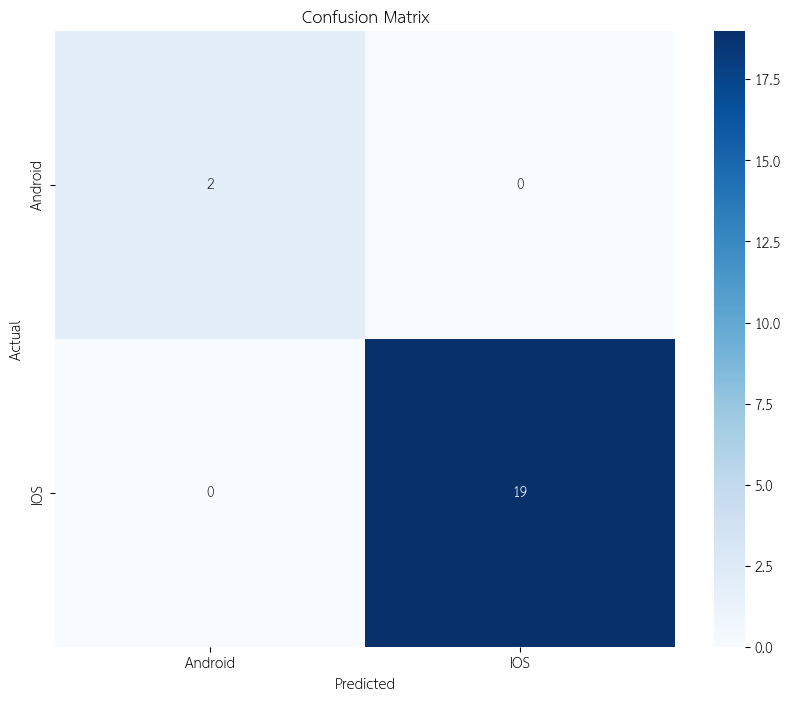

In [183]:
# (1) ประเมินประสิทธิภาพของโมเดล (Fit a linear logistic regression model)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
report =  classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# (2) สร้าง confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [184]:
warnings.filterwarnings('ignore') # ปรับไม่ให้แสดงข้อความ warning

scaler = StandardScaler() # create the scaler object
scaler.fit(X_train) # fit the scaler object to the training data

# ทดสอบการทำนายด้วยข้อมูลใหม่
new_data = X_test.iloc[0:1]  # ใช้ข้อมูลแถวแรกของ test set เป็นตัวอย่าง
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
prediction_proba = model.predict_proba(new_data_scaled)

print("\nPrediction for new data:")
print("Predicted OS:", le.inverse_transform(prediction)[0])
print("Probabilities:")
for os, prob in zip(le.classes_, prediction_proba[0]):
    print(f"{os}: {prob:.4f}")


Prediction for new data:
Predicted OS: IOS
Probabilities:
Android: 0.3105
IOS: 0.6895


## 4. SHAP Explain (Explain the linear model)

### 4.1 Build on X Train

In [185]:
explainer = shap.Explainer(model, X_train)

### 4.2 Explained X Test

In [186]:
shap_values = explainer(X_test)

## 5. Results

### 5.1 Summarize the effect of all the features

#### 5.1.1 Rank Feature Importance by bar

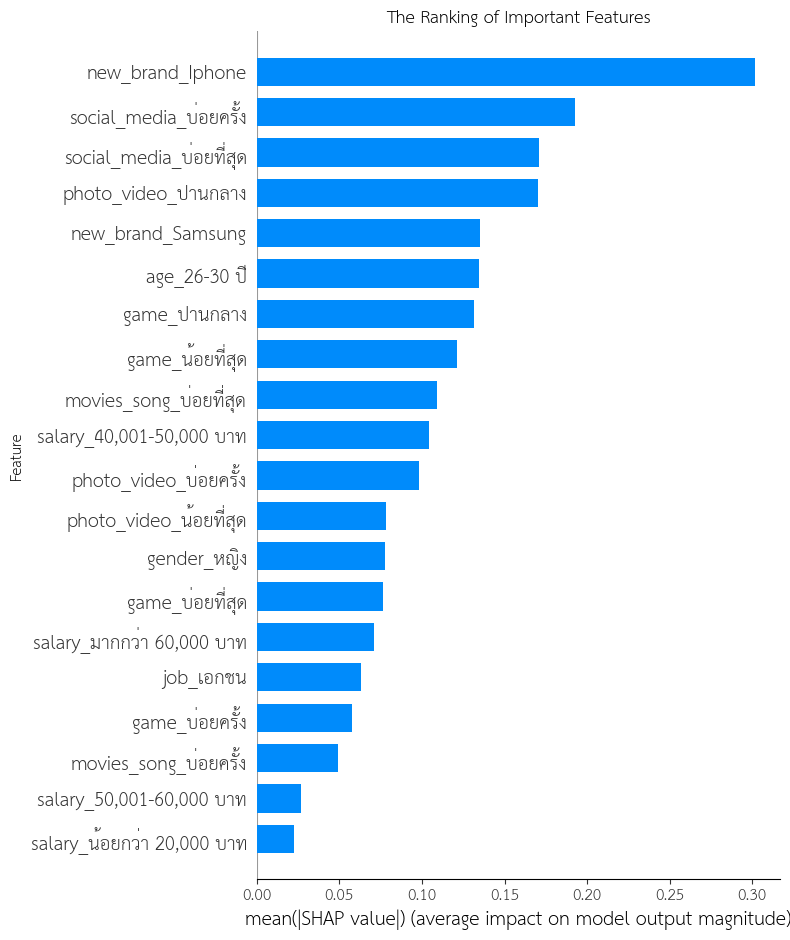

In [187]:
# วิเคราะห์ความสำคัญของ Features
plt.title('The Ranking of Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
shap.summary_plot(shap_values, X_test, plot_type="bar")

#### 5.1.2 Rank Feature Importance by using beeswarm

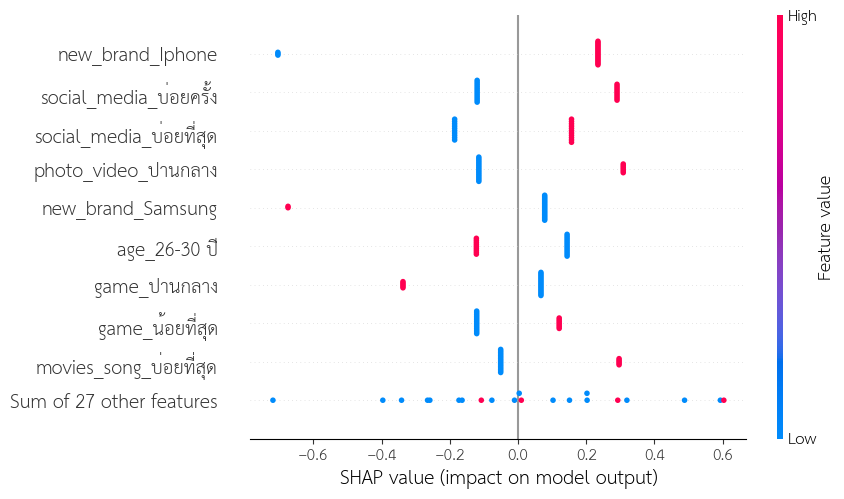

In [188]:
shap.plots.beeswarm(shap_values)

### 5.2 Analyze one sample (Randomly) from test set

#### 5.2.1 Explain a single prediction from the test set

- Explain the first review’s sentiment prediction

In [189]:
shap.initjs()
shap.plots.force(shap_values[0])

- Explain the second review’s sentiment prediction

In [190]:
shap.initjs()
shap.plots.force(shap_values[1])

#### 5.2.2 Explain all the predictions in the test set

In [191]:
linear_lr = sklearn.linear_model.LogisticRegression(solver="newton-cg")
linear_lr.fit(X_train, y_train)
shap.plots.initjs() # แสดงผล shap

# คำนวณและแสดงค่า Accuracy
y_pred = linear_lr.predict(X_test) # call the predict function with X_test
accuracy = accuracy_score(y_test, y_pred) # calculate the accuracy score
print(f"Accuracy: {accuracy}") # print the accuracy

# Explain all the predictions in the test set
explainer = shap.KernelExplainer(linear_lr.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

Accuracy: 1.0


  0%|          | 0/21 [00:00<?, ?it/s]